In [ ]:
from google.colab import files
uploaded = files.upload()


Saving archive.zip to archive.zip


In [ ]:
import zipfile

zip_path = "/content/archive.zip"
extract_path = "/content/"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction terminée.")


Extraction terminée.


In [ ]:
import os

os.listdir("/content/")


['.config', 'archive.zip', 'train', 'test', 'sample_data']

In [ ]:
train_path = "/content/train"
test_path = "/content/test"


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 48
batch_size = 64

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
train_data = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_size, img_size),
    color_mode="grayscale",
    class_mode="categorical",
    batch_size=batch_size,
    shuffle=True
)

test_data = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_size, img_size),
    color_mode="grayscale",
    class_mode="categorical",
    batch_size=batch_size,
    shuffle=False
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
from tensorflow.keras import layers, models

num_classes = 7  # FER2013 : 7 émotions

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355,847 (1.36 MB)

 Trainable params: 355,847 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_data,
    epochs=20,
    validation_data=test_data
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 123s 268ms/step - accuracy: 0.2634 - loss: 1.7977 - val_accuracy: 0.3543 - val_loss: 1.6409
Epoch 2/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 120s 267ms/step - accuracy: 0.3564 - loss: 1.6309 - val_accuracy: 0.4592 - val_loss: 1.4554
Epoch 3/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 123s 274ms/step - accuracy: 0.4302 - loss: 1.4916 - val_accuracy: 0.4759 - val_loss: 1.3696
Epoch 4/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 123s 274ms/step - accuracy: 0.4615 - loss: 1.3954 - val_accuracy: 0.4994 - val_loss: 1.3028
Epoch 5/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 123s 275ms/step - accuracy: 0.4964 - loss: 1.3165 - val_accuracy: 0.5234 - val_loss: 1.2427
Epoch 6/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 119s 266ms/step - accuracy: 0.5091 - loss: 1.2925 - val_accuracy: 0.5301 - val_loss: 1.2262
Epoch 7/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 119s 265ms/step - accuracy: 0.5224 - loss: 1.2549 - val_accuracy: 0.5419 - val_loss: 1.1826
Epoch 8/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 119s 265ms/step - accuracy: 0.5317 -

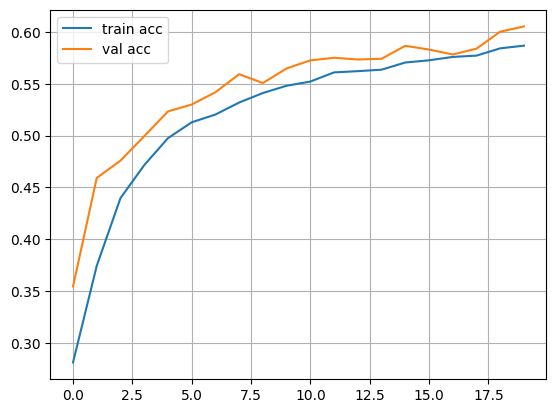

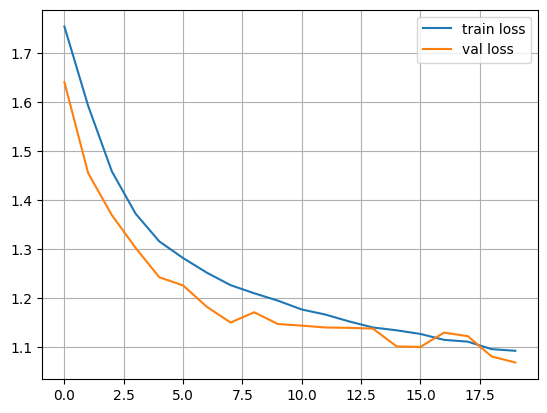

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend(); plt.grid(); plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend(); plt.grid(); plt.show()


In [ ]:
loss, acc = model.evaluate(test_data)
print("Accuracy test :", acc)


113/113 ━━━━━━━━━━━━━━━━━━━━ 9s 83ms/step - accuracy: 0.5501 - loss: 1.1682
Accuracy test : 0.6054611206054688


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


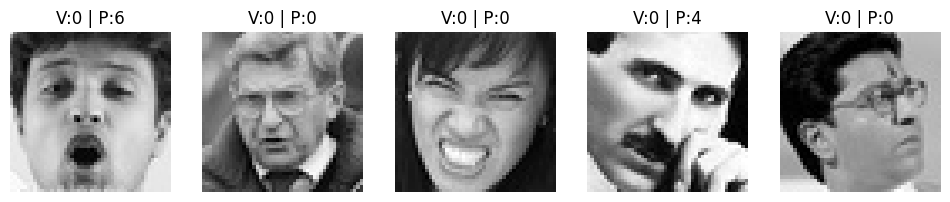

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x, y = next(test_data)  # un batch
pred = model.predict(x)
pred_labels = np.argmax(pred, axis=1)

plt.figure(figsize=(12,3))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x[i].reshape(48,48), cmap='gray')
    plt.title(f"V:{np.argmax(y[i])} | P:{pred_labels[i]}")
    plt.axis('off')
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving PrivateTest_7969511.jpg to PrivateTest_7969511.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step


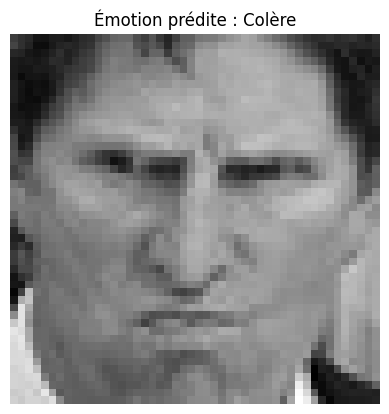

Probabilités par classe :
Colère : 0.8756
Dégoût : 0.0183
Peur : 0.0571
Joie : 0.0000
Tristesse : 0.0094
Surprise : 0.0395
Neutre : 0.0001


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Labels des émotions FER-2013
emotion_labels = ["Colère", "Dégoût", "Peur", "Joie", "Tristesse", "Surprise", "Neutre"]

# Nom du fichier uploadé
img_path = list(uploaded.keys())[0]

# Chargement de l’image en niveaux de gris
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Redimensionner en 48x48 comme FER2013
img_resized = cv2.resize(img, (48, 48))

# Normalisation
img_normalized = img_resized.astype("float32") / 255.0

# Ajouter dims : (48,48,1) → batch(1,48,48,1)
img_input = np.expand_dims(img_normalized, axis=0)
img_input = np.expand_dims(img_input, axis=-1)

# Prédiction
pred = model.predict(img_input)
emotion_index = np.argmax(pred)
emotion = emotion_labels[emotion_index]

# Affichage
plt.imshow(img, cmap='gray')
plt.title(f"Émotion prédite : {emotion}")
plt.axis("off")
plt.show()

print("Probabilités par classe :")
for i, p in enumerate(pred[0]):
    print(f"{emotion_labels[i]} : {p:.4f}")


In [ ]:
pip install opencv-python tensorflow numpy


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# ---------------------
# 1. Charger le modèle
# ---------------------
model = load_model("model.h5")  # change si ton modèle a un autre nom

# Les classes que ton modèle prédit
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# ---------------------
# 2. Ouvrir la webcam
# ---------------------
cap = cv2.VideoCapture(0)  # 0 = webcam principale

# Cascade pour détecter les visages
face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # ---------------------
    # 3. Détection de visage
    # ---------------------
    faces = face_detector.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        roi = gray[y:y+h, x:x+w]
        roi = cv2.resize(roi, (48, 48))     # modèle FER standard
        roi = roi.astype("float") / 255.0
        roi = np.expand_dims(roi, axis=-1)
        roi = np.expand_dims(roi, axis=0)

        # ---------------------
        # 4. Prédire l’émotion
        # ---------------------
        prediction = model.predict(roi)
        emotion = emotion_labels[np.argmax(prediction)]

        # Affichage sur l’image
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(frame, emotion, (x, y-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # ---------------------
    # 5. Affichage live
    # ---------------------
    cv2.imshow('Emotion Recognition', frame)

    # Appuyer sur 'q' pour quitter
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [ ]:
model.save('model.h5')

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()


In [ ]:
from google.colab import output
from IPython.display import display, Javascript

def start_webcam():
    display(Javascript('''
    navigator.mediaDevices.getUserMedia({video: true})
      .then(stream => {
        const video = document.createElement('video');
        video.id = 'webcam_stream';
        video.srcObject = stream;
        video.autoplay = true;
        document.body.appendChild(video);
      });
    '''))

start_webcam()


<IPython.core.display.Javascript object>

In [ ]:
!pip install opencv-python


In [ ]:
from tensorflow.keras.models import load_model

model = load_model("model.h5")

# IMPORTANT : classes à adapter selon ton dataset
emotion_classes = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from IPython.display import Javascript

def get_frame():
    js = Javascript('''
    async function getFrame() {
      const video = document.getElementById('webcam_stream');
      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      const ctx = canvas.getContext('2d');
      ctx.drawImage(video, 0, 0);
      return canvas.toDataURL('image/jpeg', 0.8);
    }
    google.colab.kernel.invokeFunction('notebook.get_frame', [], {});
    ''')

    display(js)

data_url = None

def _get_frame_callback():
    from google.colab import output
    global data_url
    data_url = output.eval_js('getFrame()')

output.register_callback('notebook.get_frame', _get_frame_callback)


In [ ]:
from google.colab import output
from IPython.display import display, Javascript

def capture_image():
    js = Javascript('''
    async function takePhoto() {
      const video = document.createElement('video');
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      video.srcObject = stream;
      await video.play();

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);

      stream.getTracks().forEach(t => t.stop());

      const dataUrl = canvas.toDataURL('image/jpeg', 0.8);
      google.colab.kernel.invokeFunction('notebook.photo', [dataUrl], {});
    }
    takePhoto();
    ''')
    display(js)

data_url = None

def _callback(d):
    global data_url
    data_url = d

output.register_callback('notebook.photo', _callback)

capture_image()


<IPython.core.display.Javascript object>

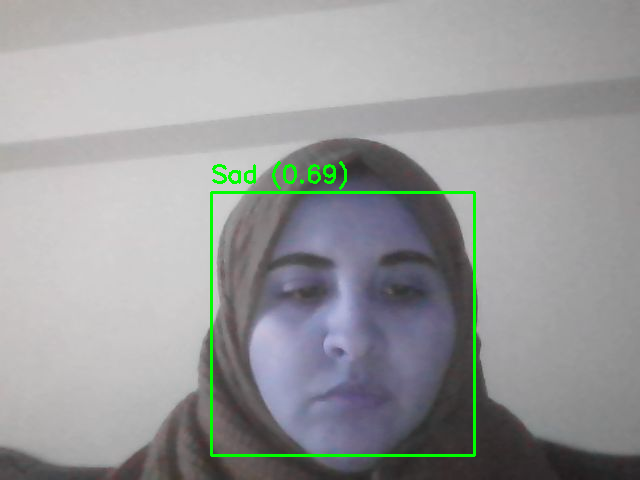

In [ ]:
import base64
import numpy as np
from PIL import Image
from io import BytesIO
import cv2
from tensorflow.keras.models import load_model

# Charger ton modèle
model = load_model("model.h5")
emotion_classes = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

# Convertir base64 → image
img_bytes = base64.b64decode(data_url.split(',')[1])
img = Image.open(BytesIO(img_bytes))
frame = np.array(img)

gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Détection visage
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x, y, w, h) in faces:
    roi = gray[y:y+h, x:x+w]
    roi = cv2.resize(roi, (48, 48))
    roi = roi.astype("float32") / 255.0
    roi = np.expand_dims(roi, axis=-1)
    roi = np.expand_dims(roi, axis=0)

    preds = model.predict(roi, verbose=0)
    emotion = emotion_classes[np.argmax(preds)]
    confidence = np.max(preds)

    cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.putText(frame, f"{emotion} ({confidence:.2f})",
                (x, y-10), cv2.FONT_HERSHEY_SIMPLEX,
                0.8, (0,255,0), 2)

from google.colab.patches import cv2_imshow
cv2_imshow(frame)
